# Scrape News Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
NewsList = []
for i in range(0, 1554):
  url=f'https://www.ft.com/search?q=FTSE&page={i}&sort=date'

  print("{}/{}".format(i+1,1554))

  header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36', 
            'cookie': 'FTAllocation=5e4e98ea-2cc7-47d9-8a25-1d05c7a9e286; o-typography-fonts-loaded=1; spoor-id=clfzq87ut00003b6gggxxqx2r; __gads=ID=adb857e9b1a83698:T=1680459551:S=ALNI_MZ2bTPQgyYnK0ncCALtV87_PmPq0w; __exponea_etc__=b0e7aafd-eb1a-4cc9-9865-6ebc26cea97f; __exponea_time2__=0.0012586116790771484; FTConsent=marketingBypost%3Aoff%2CmarketingByemail%3Aoff%2CmarketingByphonecall%3Aoff%2CmarketingByfax%3Aoff%2CmarketingBysms%3Aoff%2CenhancementBypost%3Aoff%2CenhancementByemail%3Aoff%2CenhancementByphonecall%3Aoff%2CenhancementByfax%3Aoff%2CenhancementBysms%3Aoff%2CbehaviouraladsOnsite%3Aon%2CdemographicadsOnsite%3Aon%2CrecommendedcontentOnsite%3Aon%2CprogrammaticadsOnsite%3Aon%2CcookiesUseraccept%3Aoff%2CcookiesOnsite%3Aoff%2CmembergetmemberByemail%3Aoff; FTCookieConsentGDPR=true; _gcl_au=1.1.336661959.1680459553; permutive-id=55b53c1f-3353-4f5c-84c1-353a455950e1; optimizelyEndUserId=oeu1680465397355r0.26542774349878395; _ga=GA1.2.1907876386.1680804611; ln_or=eyIyMTU2MSI6ImQifQ%3D%3D; _awl=2.1681902191.5-92cb7486b33d66a15f561850b984764b-6763652d617369612d6561737431-0'}

  response = requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, "html.parser")
  element = soup.find_all('li', class_='search-results__list-item')

  for i in element:
    try:
      title = str(i.find('div', class_="o-teaser__heading"))
      #print(title.getText())
      title_clean = BeautifulSoup(title, "lxml").text
    except TypeError:
      title = 'None'
      title_clean = 'None'
    try:
      image = i.find('img', class_='o-teaser__image o-lazy-load')
      img = image['data-src']
    except TypeError:
      image = 'None'
      img = 'None'
    try:
      desc = str(i.find('p',class_ = 'o-teaser__standfirst'))
      #desc =
      desc_clean = BeautifulSoup(desc, "lxml").text
    except TypeError:
      desc = 'None'
      desc_clean = 'None'
    try:
      time = i.find('time','o-teaser__timestamp-date')
      dateTime = time['datetime']
    except TypeError:
      time = 'None'
      dateTime = 'None'
    NewsList.append((title_clean, img, desc_clean, dateTime))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
NewsList

[('European shares slip as investors await economic data and US earnings',
  'https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2F15614282-c63c-4cde-b18b-2ac2b1b34e2d.jpg?source=next&fit=scale-down&dpr=2&width=240',
  '...London’s FTSE 100 lost 0.3 per cent after annual UK consumer price growth last month eased by less than expected to 10.1 per cent, down from 10.4 per cent in February....',
  '2023-04-19T10:06:19+0000'),
 ('European stocks ease ahead of eurozone inflation data',
  'None',
  '...London’s FTSE 100 lost 0.3 per cent after annual UK consumer price growth last month eased by less than expected to 10.1 per cent, down from 10.4 per cent in February....',
  '2023-04-19T07:54:27+0000'),
 ('None', 'None', 'None', 'None'),
 ('Risers and fallers in Europe',
  'None',
  '...Liontrust Asset Management fell 6 per cent to the bottom of the FTSE 250 after the fund manager posted £4.8bn of net annual outflows amid weak inv

In [ ]:
df = pd.DataFrame(NewsList, columns=('title', 'image', 'description', 'time'))
df

,title,image,description,time
0,European shares slip as investors await econom...,https://www.ft.com/__origami/service/image/v2/...,...London’s FTSE 100 lost 0.3 per cent after a...,2023-04-19T10:06:19+0000
1,European stocks ease ahead of eurozone inflati...,None,...London’s FTSE 100 lost 0.3 per cent after a...,2023-04-19T07:54:27+0000
2,None,None,None,None
3,Risers and fallers in Europe,None,...Liontrust Asset Management fell 6 per cent ...,2023-04-19T07:52:33+0000
4,Liontrust bullish on yearly profits despite ou...,None,...The FTSE 250 group — which on Tuesday confi...,2023-04-19T06:51:50+0000
...,...,...,...,...
1115,US stocks spring higher to close out best mont...,https://www.ft.com/__origami/service/image/v2/...,...The FTSE All-World index of developed and e...,2022-07-29T20:04:31+0000
1116,Global stocks head for biggest monthly gain si...,None,...The FTSE All-World index of developed and e...,2022-07-29T16:31:44+0000
1117,Global stocks rebound in July after grim first...,None,...The FTSE All-World index of developed and e...,2022-07-29T14:01:39+0000
1118,Stocks on course for best month since November...,None,...The FTSE All World index of developed and e...,2022-07-29T08:50:18+0000


# Preprocessing

In [ ]:
df[['date', 'time']] = df['time'].str.split('T', expand=True)

In [ ]:
df['title&desc'] = df['title'] + ": " + df['description']

In [ ]:
df.to_csv('FTSE100_rawdata.csv')

In [ ]:
df

,title,image,description,time,date,title&desc
0,European shares slip as investors await econom...,https://www.ft.com/__origami/service/image/v2/...,...London’s FTSE 100 lost 0.3 per cent after a...,10:06:19+0000,2023-04-19,European shares slip as investors await econom...
1,European stocks ease ahead of eurozone inflati...,None,...London’s FTSE 100 lost 0.3 per cent after a...,07:54:27+0000,2023-04-19,European stocks ease ahead of eurozone inflati...
2,None,None,None,None,None,None: None
3,Risers and fallers in Europe,None,...Liontrust Asset Management fell 6 per cent ...,07:52:33+0000,2023-04-19,Risers and fallers in Europe: ...Liontrust Ass...
4,Liontrust bullish on yearly profits despite ou...,None,...The FTSE 250 group — which on Tuesday confi...,06:51:50+0000,2023-04-19,Liontrust bullish on yearly profits despite ou...
...,...,...,...,...,...,...
1115,US stocks spring higher to close out best mont...,https://www.ft.com/__origami/service/image/v2/...,...The FTSE All-World index of developed and e...,20:04:31+0000,2022-07-29,US stocks spring higher to close out best mont...
1116,Global stocks head for biggest monthly gain si...,None,...The FTSE All-World index of developed and e...,16:31:44+0000,2022-07-29,Global stocks head for biggest monthly gain si...
1117,Global stocks rebound in July after grim first...,None,...The FTSE All-World index of developed and e...,14:01:39+0000,2022-07-29,Global stocks rebound in July after grim first...
1118,Stocks on course for best month since November...,None,...The FTSE All World index of developed and e...,08:50:18+0000,2022-07-29,Stocks on course for best month since November...


In [ ]:
df['time'][0]

'10:06:19+0000'

In [ ]:
#dateTime = df['time'][0]['datetime']
#dateTime

In [ ]:
#from dateutil import parser

In [ ]:
#date_time_str = df['time'][0].get('datetime')
#date_time = parser.parse(date_time_str)
#print(date_time.date())
#print(date_time.time())

In [ ]:
#dateList = []
#timeList = []
#for i in df['time']:
  #try:
    #date_time_str = df['time'][i].get('datetime')
    #date_time = parser.parse(date_time_str)
    #dateList.append(str(date_time.date()))
    #timeList.append(str(date_time.time()))
  #except Error:
    #dateList.append('None')
    #timeList.append('None') #*/

# Sentiment Analysis

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Build Model

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
trainer = Trainer(model=model)

##Title&Description Sentiment Analysis

In [ ]:
file_name = "/content/FT_FTSE100_rawdata.csv"
text_column = "title&desc"

df_pred = pd.read_csv(file_name)
pred_texts = df_pred[text_column].astype('str').tolist()

In [ ]:
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)
predictions = trainer.predict(pred_dataset)
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
df_text_sentiment = pd.DataFrame(list(zip(pred_texts,preds,labels,scores)), columns=['text','pred','label','score'])
df_text_sentiment

,text,pred,label,score
0,European shares slip as investors await econom...,0,negative,0.998866
1,European stocks ease ahead of eurozone inflati...,0,negative,0.998293
2,None: None,1,neutral,0.999833
3,Risers and fallers in Europe: ...Liontrust Ass...,0,negative,0.998808
4,Liontrust bullish on yearly profits despite ou...,0,negative,0.998707
...,...,...,...,...
1115,US stocks spring higher to close out best mont...,2,positive,0.999705
1116,Global stocks head for biggest monthly gain si...,2,positive,0.999701
1117,Global stocks rebound in July after grim first...,2,positive,0.999710
1118,Stocks on course for best month since November...,2,positive,0.999708


In [ ]:
df['text_score'] = df_text_sentiment['pred']
df['text_label'] = df_text_sentiment['label']

##Title Sentiment Analysis

In [ ]:
file_name = "/content/FT_FTSE100_rawdata.csv"
text_column = "title"

df_pred = pd.read_csv(file_name)
pred_texts = df_pred[text_column].astype('str').tolist()

In [ ]:
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)
predictions = trainer.predict(pred_dataset)
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
df_title_sentiment = pd.DataFrame(list(zip(pred_texts,preds,labels,scores)), columns=['text','pred','label','score'])
df_title_sentiment

,text,pred,label,score
0,European shares slip as investors await econom...,0,negative,0.996851
1,European stocks ease ahead of eurozone inflati...,2,positive,0.997861
2,None,1,neutral,0.999841
3,Risers and fallers in Europe,1,neutral,0.538659
4,Liontrust bullish on yearly profits despite ou...,2,positive,0.999502
...,...,...,...,...
1115,US stocks spring higher to close out best mont...,2,positive,0.999663
1116,Global stocks head for biggest monthly gain si...,2,positive,0.999693
1117,Global stocks rebound in July after grim first...,2,positive,0.999651
1118,Stocks on course for best month since November...,2,positive,0.998680


In [ ]:
df['title_score'] = df_title_sentiment['pred']
df['title_label'] = df_title_sentiment['label']

## Description Sentiment Analysis

In [ ]:
file_name = "/content/FT_FTSE100_rawdata.csv"
text_column = "description"

df_pred = pd.read_csv(file_name)
pred_texts = df_pred[text_column].astype('str').tolist()

In [ ]:
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)
predictions = trainer.predict(pred_dataset)
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
df_description_sentiment = pd.DataFrame(list(zip(pred_texts,preds,labels,scores)), columns=['text','pred','label','score'])
df_description_sentiment

,text,pred,label,score
0,...London’s FTSE 100 lost 0.3 per cent after a...,0,negative,0.998427
1,...London’s FTSE 100 lost 0.3 per cent after a...,0,negative,0.998427
2,None,1,neutral,0.999841
3,...Liontrust Asset Management fell 6 per cent ...,0,negative,0.998746
4,...The FTSE 250 group — which on Tuesday confi...,0,negative,0.998574
...,...,...,...,...
1115,...The FTSE All-World index of developed and e...,2,positive,0.999716
1116,...The FTSE All-World index of developed and e...,2,positive,0.999694
1117,...The FTSE All-World index of developed and e...,2,positive,0.999705
1118,...The FTSE All World index of developed and e...,2,positive,0.999712


In [ ]:
df['description_score'] = df_description_sentiment['pred']
df['description_label'] = df_description_sentiment['label']

# Image to Text

In [ ]:
df['image'] = df['image'].replace('width=240', 'width=1080', regex = True)

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
df['image'] = df['image'].replace('width=240', 'width=1080', regex = True)

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
import numpy as np
df['image_desc'] = np.nan

In [ ]:
for index, link in enumerate(df['image']):
  if df['image'][index] != 'None':
    img_url = link
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

    # conditional image captioning
    text = "a photography of"
    inputs = processor(raw_image, text, return_tensors="pt")

    out = model.generate(**inputs)
    #print(processor.decode(out[0], skip_special_tokens=True))
    # >>> a photography of a woman and her dog

    # unconditional image captioning
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    df['image_desc'][index] = processor.decode(out[0], skip_special_tokens=True)
    print(processor.decode(out[0], skip_special_tokens=True))
    #a woman sitting on the beach with her dog

the world map with a red background
two men in a factory
a large red and black vending machine
a sign for a gas station
a person walking down a sidewalk in front of a building
a street sign with a red background
a city skyline with a red sky in the background
a close up of a computer screen displaying a stock market graph
a mountain with snow on it
an older man in a suit and tie
a street sign with a red background
a coal mine in the middle of the country
a man is putting a piece of fruit into a veg veg veg veg ve
a man in a suit and tie standing in front of a building
a street sign with a red background
a woman in a hotel room holding a towel
the world map with a red background
two men in a factory
a large red and black vending machine
a sign for a gas station
a person walking down a sidewalk in front of a building
a street sign with a red background
a city skyline with a red sky in the background
a close up of a computer screen displaying a stock market graph
a mountain with snow on i

In [ ]:
df['image_desc'] = df['image_desc'].replace(np.nan, 'np.nan')

## Image Description Sentiment Analysis

In [ ]:
df['content'] = '(' + df['image_desc'] + '.) ' + df['title'] + ': ' + df['description']

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
trainer = Trainer(model=model)

In [ ]:
df.to_csv('FT_FTSE100_imagetext.csv')

In [ ]:
file_name = "FT_FTSE100_imagetext.csv"
text_column = "content"

df_pred = pd.read_csv(file_name)
pred_texts = df_pred[text_column].astype('str').tolist()

In [ ]:
class SimpleDataset:
    def __init__(self, tokenized_texts):
        self.tokenized_texts = tokenized_texts
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        return {k: v[idx] for k, v in self.tokenized_texts.items()}

In [ ]:
tokenized_texts = tokenizer(pred_texts,truncation=True,padding=True)
pred_dataset = SimpleDataset(tokenized_texts)
predictions = trainer.predict(pred_dataset)
preds = predictions.predictions.argmax(-1)
labels = pd.Series(preds).map(model.config.id2label)
scores = (np.exp(predictions[0])/np.exp(predictions[0]).sum(-1,keepdims=True)).max(1)

In [ ]:
df_content_sentiment = pd.DataFrame(list(zip(pred_texts,preds,labels,scores)), columns=['text','pred','label','score'])
df_content_sentiment

,text,pred,label,score
0,(the world map with a red background.) Europea...,0,negative,0.998863
1,(np.nan.) European stocks ease ahead of eurozo...,0,negative,0.998261
2,(np.nan.) None: None,1,neutral,0.999857
3,(np.nan.) Risers and fallers in Europe: ...Lio...,0,negative,0.998787
4,(np.nan.) Liontrust bullish on yearly profits ...,0,negative,0.998612
...,...,...,...,...
1115,(a smiling face on the wall.) US stocks spring...,2,positive,0.999714
1116,(np.nan.) Global stocks head for biggest month...,2,positive,0.999702
1117,(np.nan.) Global stocks rebound in July after ...,2,positive,0.999709
1118,(np.nan.) Stocks on course for best month sinc...,2,positive,0.999704


In [ ]:
df['content_score'] = df_content_sentiment['pred']
df['content_label'] = df_content_sentiment['label']

In [ ]:
df.to_csv('FT_FTSE100_sentiment.csv')

# Face Analysis

In [ ]:
df['image'] = df['image'].replace('width=240', 'width=1080', regex = True)

In [ ]:
for index, link in enumerate(df['image']):
  if df['image'][index] != 'None':
    with open(f'/content/FTSE100/{index}.png', 'wb') as f:
        r = requests.get(link).content
        f.write(r)

In [ ]:
!zip -r /content/FTSE100.zip /content/FTSE100

  adding: content/FTSE100/ (stored 0%)
  adding: content/FTSE100/609.png (deflated 3%)
  adding: content/FTSE100/161.png (deflated 12%)
  adding: content/FTSE100/664.png (deflated 5%)
  adding: content/FTSE100/215.png (deflated 5%)
  adding: content/FTSE100/123.png (deflated 6%)
  adding: content/FTSE100/893.png (deflated 1%)
  adding: content/FTSE100/918.png (deflated 0%)
  adding: content/FTSE100/919.png (deflated 0%)
  adding: content/FTSE100/611.png (deflated 3%)
  adding: content/FTSE100/377.png (deflated 2%)
  adding: content/FTSE100/186.png (deflated 3%)
  adding: content/FTSE100/687.png (deflated 4%)
  adding: content/FTSE100/555.png (deflated 4%)
  adding: content/FTSE100/402.png (deflated 8%)
  adding: content/FTSE100/643.png (deflated 2%)
  adding: content/FTSE100/389.png (deflated 3%)
  adding: content/FTSE100/503.png (deflated 5%)
  adding: content/FTSE100/137.png (deflated 3%)
  adding: content/FTSE100/816.png (deflated 2%)
  adding: content/FTSE100/558.png (deflated 2%)


In [ ]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=e8f906914441c33e132bdab3120ddf33db2e1391d0c58d95544304e632640dbe
  Stored in directory: /root/.cache/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
!pip install fer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.2 MB/s eta 0:00:00


In [ ]:
from fer import FER
import cv2

In [ ]:
emotion_detector = FER(mtcnn=True)

In [ ]:
from collections import Counter
def get_emotion_from_image(image_path):
  try:
    test_img = cv2.imread(image_path)
    analysis = emotion_detector.detect_emotions(test_img)
    emotion_store=[]
    emotion_score_all=0
    print(analysis)
    for index in range(len(analysis)):
      emotion_this=analysis[index]['emotions']
      emotion_name=max(emotion_this , key=emotion_this.get)
      if emotion_name in ["angry","digust","fear","sad"]:
        emotion_classify="negative"
        emotion_score=-1
        emotion_score_all+=emotion_score
      elif emotion_name in ["happy"]:
        emotion_classify="positive"
        emotion_score=2
        emotion_score_all+=emotion_score
      elif emotion_name in ["neutral","surprise"]:
        emotion_classify="neutral"
        emotion_score=1
        emotion_score_all+=emotion_score
      emotion_store.append(emotion_classify)
    emotion_statistics=Counter(emotion_store)
    emotion_most=emotion_statistics.most_common(1)[0][0]
    
    return emotion_most, emotion_store, emotion_score_all
  except:
    pass
    return 'No face detected', 'No face detected', 0

In [ ]:
emotionList = []
emotionOther = []
emotionScore = []
for i in range(len(df)):
  try:
    emotion_result, emotion_other, emotion_score = get_emotion_from_image(f"/content/FTSE100/{i}.png")
  except Error:
    emotion_result = 'None'
  emotionList.append(emotion_result)
  emotionOther.append(emotion_other)
  emotionScore.append(emotion_score)

[]
[]
[{'box': [126, 49, 61, 75], 'emotions': {'angry': 0.09, 'disgust': 0.0, 'fear': 0.02, 'happy': 0.11, 'sad': 0.31, 'surprise': 0.0, 'neutral': 0.46}}, {'box': [294, 25, 59, 71], 'emotions': {'angry': 0.11, 'disgust': 0.0, 'fear': 0.19, 'happy': 0.11, 'sad': 0.2, 'surprise': 0.04, 'neutral': 0.34}}, {'box': [198, 52, 38, 50], 'emotions': {'angry': 0.15, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.21, 'sad': 0.11, 'surprise': 0.0, 'neutral': 0.52}}]
[]
[]
[]
[]
[]
[]
[]
[{'box': [172, 56, 65, 86], 'emotions': {'angry': 0.27, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.0, 'sad': 0.22, 'surprise': 0.0, 'neutral': 0.49}}]
[]
[]
[]
[]
[]
[]
[]
[]
[{'box': [126, 49, 61, 75], 'emotions': {'angry': 0.09, 'disgust': 0.0, 'fear': 0.02, 'happy': 0.11, 'sad': 0.31, 'surprise': 0.0, 'neutral': 0.46}}, {'box': [294, 25, 59, 71], 'emotions': {'angry': 0.11, 'disgust': 0.0, 'fear': 0.19, 'happy': 0.11, 'sad': 0.2, 'surprise': 0.04, 'neutral': 0.34}}, {'box': [198, 52, 38, 50], 'emotions': {'angry': 0.15

In [ ]:
df['emotion_face'] = emotionList

In [ ]:
df['emotion_all'] = emotionOther

In [ ]:
df['emotion_score'] = emotionScore

In [ ]:
#df['emotion_score'] = df['emotion_score'].replace('None', 0 , regex = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1120 non-null   int64         
 1   title               1120 non-null   object        
 2   image               1120 non-null   object        
 3   description         1120 non-null   object        
 4   time                999 non-null    object        
 5   date                1120 non-null   datetime64[ns]
 6   title&desc          1120 non-null   object        
 7   text_score          1120 non-null   int64         
 8   text_label          1120 non-null   object        
 9   title_score         1120 non-null   int64         
 10  title_label         1120 non-null   object        
 11  emotion_face        1120 non-null   object        
 12  emotion_all         1120 non-null   object        
 13  emotion_score       1120 non-null   int64       

In [ ]:
df['text&emotion_score'] = df['emotion_score'] + df['text_score']

In [ ]:
df['total_score'] = df['emotion_score'] + df['content_score']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1120 non-null   int64 
 1   title               1120 non-null   object
 2   image               1120 non-null   object
 3   description         1120 non-null   object
 4   time                999 non-null    object
 5   date                1120 non-null   object
 6   title&desc          1120 non-null   object
 7   text_score          1120 non-null   int64 
 8   text_label          1120 non-null   object
 9   title_score         1120 non-null   int64 
 10  title_label         1120 non-null   object
 11  emotion_face        1120 non-null   object
 12  emotion_all         1120 non-null   object
 13  emotion_score       1120 non-null   int64 
 14  description_score   1120 non-null   int64 
 15  description_label   1120 non-null   object
 16  image_desc          1120

In [ ]:
df.to_csv('FT_FTSE100_score.csv')

# Financial Data and Merge

In [1]:
import yfinance as yf

In [ ]:
FTSE = yf.download('^FTSE',period= '5y', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
FTSE['date'] = FTSE.index

In [ ]:
FTSE

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2018-04-19,7317.299805,7340.700195,7309.399902,7328.899902,7328.899902,788416300,2018-04-19
2018-04-20,7328.899902,7368.200195,7323.299805,7368.200195,7368.200195,769512800,2018-04-20
2018-04-23,7368.200195,7404.100098,7359.700195,7398.899902,7398.899902,777571800,2018-04-23
2018-04-24,7398.899902,7439.600098,7397.299805,7425.399902,7425.399902,836399400,2018-04-24
2018-04-25,7425.399902,7427.100098,7334.600098,7379.299805,7379.299805,879795200,2018-04-25
...,...,...,...,...,...,...,...
2023-04-13,7824.799805,7851.600098,7814.100098,7843.399902,7843.399902,724768300,2023-04-13
2023-04-14,7843.399902,7904.000000,7843.399902,7871.899902,7871.899902,860530500,2023-04-14
2023-04-17,7871.899902,7916.700195,7871.899902,7879.500000,7879.500000,665446000,2023-04-17


In [ ]:
FTSE['gap'] = FTSE['Adj Close'].diff()

In [ ]:
FTSE.loc[FTSE['gap'] >= 0,'gap'] = 1
FTSE.loc[FTSE['gap'] < 0,'gap'] = 0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1120 non-null   int64 
 1   title               1120 non-null   object
 2   image               1120 non-null   object
 3   description         1120 non-null   object
 4   time                999 non-null    object
 5   date                1120 non-null   object
 6   title&desc          1120 non-null   object
 7   text_score          1120 non-null   int64 
 8   text_label          1120 non-null   object
 9   title_score         1120 non-null   int64 
 10  title_label         1120 non-null   object
 11  emotion_face        1120 non-null   object
 12  emotion_all         1120 non-null   object
 13  emotion_score       1120 non-null   int64 
 14  description_score   1120 non-null   int64 
 15  description_label   1120 non-null   object
 16  image_desc          1120

In [ ]:
df['date'] = df['date'].replace('None', 0, regex = True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df_merge = pd.merge(df, FTSE, on='date')

In [ ]:
df_merge

,Unnamed: 0,title,image,description,time,date,title&desc,text_score,text_label,title_score,...,content_label,total_score,text&emotion_score,Open,High,Low,Close,Adj Close,Volume,gap
0,0,European shares slip as investors await econom...,https://www.ft.com/__origami/service/image/v2/...,...London’s FTSE 100 lost 0.3 per cent after a...,10:06:19+0000,2023-04-19,European shares slip as investors await econom...,0,negative,0,...,negative,0,0,7909.439941,7909.439941,7871.430176,7898.770020,7898.770020,0,0.0
1,1,European stocks ease ahead of eurozone inflati...,None,...London’s FTSE 100 lost 0.3 per cent after a...,07:54:27+0000,2023-04-19,European stocks ease ahead of eurozone inflati...,0,negative,2,...,negative,0,0,7909.439941,7909.439941,7871.430176,7898.770020,7898.770020,0,0.0
2,3,Risers and fallers in Europe,None,...Liontrust Asset Management fell 6 per cent ...,07:52:33+0000,2023-04-19,Risers and fallers in Europe: ...Liontrust Ass...,0,negative,1,...,negative,0,0,7909.439941,7909.439941,7871.430176,7898.770020,7898.770020,0,0.0
3,4,Liontrust bullish on yearly profits despite ou...,None,...The FTSE 250 group — which on Tuesday confi...,06:51:50+0000,2023-04-19,Liontrust bullish on yearly profits despite ou...,0,negative,2,...,negative,0,0,7909.439941,7909.439941,7871.430176,7898.770020,7898.770020,0,0.0
4,28,European shares slip as investors await econom...,https://www.ft.com/__origami/service/image/v2/...,...London’s FTSE 100 lost 0.3 per cent after a...,10:06:19+0000,2023-04-19,European shares slip as investors await econom...,0,negative,0,...,negative,0,0,7909.439941,7909.439941,7871.430176,7898.770020,7898.770020,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,1115,US stocks spring higher to close out best mont...,https://www.ft.com/__origami/service/image/v2/...,...The FTSE All-World index of developed and e...,20:04:31+0000,2022-07-29,US stocks spring higher to close out best mont...,2,positive,2,...,positive,2,2,7345.299805,7441.200195,7345.299805,7423.399902,7423.399902,883363000,1.0
940,1116,Global stocks head for biggest monthly gain si...,None,...The FTSE All-World index of developed and e...,16:31:44+0000,2022-07-29,Global stocks head for biggest monthly gain si...,2,positive,2,...,positive,2,2,7345.299805,7441.200195,7345.299805,7423.399902,7423.399902,883363000,1.0
941,1117,Global stocks rebound in July after grim first...,None,...The FTSE All-World index of developed and e...,14:01:39+0000,2022-07-29,Global stocks rebound in July after grim first...,2,positive,2,...,positive,2,2,7345.299805,7441.200195,7345.299805,7423.399902,7423.399902,883363000,1.0
942,1118,Stocks on course for best month since November...,None,...The FTSE All World index of developed and e...,08:50:18+0000,2022-07-29,Stocks on course for best month since November...,2,positive,2,...,positive,2,2,7345.299805,7441.200195,7345.299805,7423.399902,7423.399902,883363000,1.0


In [ ]:
df_merge.describe()

,Unnamed: 0,text_score,title_score,emotion_score,description_score,content_score,total_score,text&emotion_score,Open,High,Low,Close,Adj Close,Volume,gap
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,9.440000e+02,944.000000
mean,556.021186,0.981992,0.978814,0.095339,1.026483,0.984110,1.079449,1.077331,7500.786585,7544.153627,7456.967420,7502.107910,7502.107910,8.377860e+08,0.585805
std,323.951451,0.929483,0.835059,0.713020,0.888442,0.918042,1.125734,1.143637,311.296584,302.899440,323.174564,312.465059,312.465059,2.850152e+08,0.492844
min,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,-2.000000,-2.000000,6826.200195,6872.899902,6707.600098,6826.200195,6826.200195,0.000000e+00,0.000000
25%,274.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7306.100098,7346.700195,7258.700195,7300.000000,7300.000000,6.662628e+08,0.000000
50%,552.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7486.700195,7516.599854,7461.700195,7482.399902,7482.399902,8.017438e+08,1.000000
75%,837.250000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,7784.700195,7830.799805,7745.399902,7784.899902,7784.899902,9.598887e+08,1.000000
max,1119.000000,2.000000,2.000000,6.000000,2.000000,2.000000,7.000000,7.000000,8014.299805,8047.100098,7995.500000,8014.299805,8014.299805,2.140678e+09,1.000000


In [ ]:
df_merge.corr()

,Unnamed: 0,text_score,title_score,emotion_score,description_score,content_score,total_score,text&emotion_score,Open,High,Low,Close,Adj Close,Volume,gap
Unnamed: 0,1.000000,-0.053876,-0.104691,0.032748,-0.058512,-0.070628,-0.036856,-0.023370,-0.692377,-0.709826,-0.684345,-0.696547,-0.696547,0.020079,-0.082233
text_score,-0.053876,1.000000,0.533711,-0.048610,0.837848,0.936699,0.733095,0.782436,0.092004,0.130174,0.125945,0.137931,0.137931,-0.016500,0.210563
title_score,-0.104691,0.533711,1.000000,-0.050035,0.358097,0.592985,0.451892,0.402575,0.109746,0.131713,0.136717,0.143740,0.143740,-0.060203,0.148716
emotion_score,0.032748,-0.048610,-0.050035,1.000000,-0.054210,-0.064105,0.581105,0.583960,-0.068480,-0.069495,-0.075092,-0.074061,-0.074061,-0.005614,-0.023304
description_score,-0.058512,0.837848,0.358097,-0.054210,1.000000,0.788413,0.608619,0.647157,0.096311,0.131732,0.129681,0.139921,0.139921,-0.010213,0.209140
content_score,-0.070628,0.936699,0.592985,-0.064105,0.788413,1.000000,0.774903,0.721328,0.092865,0.130175,0.128297,0.140650,0.140650,-0.022442,0.224504
total_score,-0.036856,0.733095,0.451892,0.581105,0.608619,0.774903,1.000000,0.958118,0.032358,0.062142,0.057065,0.067791,0.067791,-0.021858,0.168324
text&emotion_score,-0.023370,0.782436,0.402575,0.583960,0.647157,0.721328,0.958118,1.000000,0.032081,0.062470,0.055544,0.065928,0.065928,-0.016911,0.156604
Open,-0.692377,0.092004,0.109746,-0.068480,0.096311,0.092865,0.032358,0.032081,1.000000,0.992192,0.988531,0.979997,0.979997,-0.213644,-0.053125
High,-0.709826,0.130174,0.131713,-0.069495,0.131732,0.130175,0.062142,0.062470,0.992192,1.000000,0.991631,0.990625,0.990625,-0.206205,0.021470


In [ ]:
df_merge.to_csv('FT_FTSE100_financial.csv')

In [2]:
#import pandas as pd
#df_merge = pd.read_csv('FT_FTSE100_financial.csv')

# Merge Date

In [10]:
def merge_all(df, key_word = 'date', news_amounts = 'news_amount', text_score_name="text_score",image_score_name="emotion_score",total_score_name="total_score", text_emotion_score_name='text&emotion_score', content_score_name='content_score', description_score_name='description_score',title_score_name='title_score'):
  time_unique=np.unique(df[key_word])
  df_amount = pd.DataFrame(columns=[key_word,news_amounts,text_score_name,image_score_name,total_score_name,text_emotion_score_name, title_score_name, description_score_name, content_score_name, "gap", 'Volume'])
  for time_get in time_unique:
    df_get_this_time_data=df[df[key_word]==time_get]
    news_amount = len(df_get_this_time_data[text_score_name])
    text_score=np.mean(df_get_this_time_data[text_score_name].values)#Or, text_score=np.mean(df_get_this_time_data["text_score"].values)
    image_score=np.mean(df_get_this_time_data[image_score_name].values) # Or,  image_score=np.mean(df_get_this_time_data["image_score"].values)
    total_score=np.mean(df_get_this_time_data[total_score_name].values)
    text_emotion_score=np.mean(df_get_this_time_data[text_emotion_score_name].values)
    content_score=np.mean(df_get_this_time_data[content_score_name].values)
    title_score=np.mean(df_get_this_time_data[title_score_name].values)
    description_score=np.mean(df_get_this_time_data[description_score_name].values)
    #print(total_score)
    # image_score=np.mean(df_get_this_time_data["image_score"])
    df_amount = df_amount._append({key_word:time_get, news_amounts: news_amount, text_score_name: text_score, image_score_name: image_score,total_score_name: total_score,text_emotion_score_name: text_emotion_score, content_score_name: content_score, description_score_name:description_score, title_score_name: title_score, "gap":df_get_this_time_data["gap"].values[0], "Volume":df_get_this_time_data["Volume"].values[0]}, ignore_index=True)

# panda_frame_file.set_index("time", drop=False)
  return df_amount

In [11]:
import numpy as np

In [12]:
df_final = merge_all(df_merge, 'date')

In [13]:
df_final['news_amount'] = df_final['news_amount'].astype(str).astype(int)
df_final['Volume'] = df_final['Volume'].astype(str).astype(int)

In [14]:
df_final

,date,news_amount,text_score,emotion_score,total_score,text&emotion_score,title_score,description_score,content_score,gap,Volume
0,2022-07-29,5,2.000000,0.0,2.000000,2.000000,1.800000,2.000000,2.000000,1.0,883363000
1,2022-08-01,5,1.200000,1.6,2.800000,2.800000,1.200000,1.200000,1.200000,0.0,558506400
2,2022-08-02,4,1.000000,0.0,0.500000,1.000000,0.750000,1.000000,0.500000,0.0,623919300
3,2022-08-03,5,0.800000,-0.2,0.600000,0.600000,0.800000,0.800000,0.800000,1.0,947917500
4,2022-08-04,7,1.428571,0.0,1.428571,1.428571,1.285714,1.428571,1.428571,1.0,858684300
...,...,...,...,...,...,...,...,...,...,...,...
174,2023-04-13,12,1.500000,0.0,1.500000,1.500000,1.666667,1.666667,1.500000,1.0,724768300
175,2023-04-14,4,1.000000,0.5,2.000000,1.500000,2.000000,1.000000,1.500000,1.0,860530500
176,2023-04-17,10,0.600000,0.0,1.000000,0.600000,1.000000,1.000000,1.000000,1.0,665446000
177,2023-04-18,10,0.600000,0.6,1.400000,1.200000,1.400000,0.600000,0.800000,1.0,531338200


In [15]:
df_final.to_csv('FT_FTSE100_final.csv')

In [16]:
df_final.corr()

<ipython-input-16-dcfd88b6da59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,news_amount,text_score,emotion_score,total_score,text&emotion_score,title_score,description_score,content_score,gap,Volume
news_amount,1.000000,0.005636,-0.105095,-0.083772,-0.052035,0.050769,-0.059935,-0.031895,0.072070,0.096613
text_score,0.005636,1.000000,0.039716,0.776608,0.842481,0.556580,0.816304,0.924662,0.393106,-0.066168
emotion_score,-0.105095,0.039716,1.000000,0.578375,0.571761,0.022881,0.015167,0.035524,-0.064989,-0.023199
total_score,-0.083772,0.776608,0.578375,1.000000,0.949480,0.530130,0.623135,0.835802,0.324922,-0.088193
text&emotion_score,-0.052035,0.842481,0.571761,0.949480,1.000000,0.469326,0.678418,0.778363,0.287728,-0.066836
title_score,0.050769,0.556580,0.022881,0.530130,0.469326,1.000000,0.326746,0.634042,0.274348,-0.115277
description_score,-0.059935,0.816304,0.015167,0.623135,0.678418,0.326746,1.000000,0.753170,0.362102,-0.072932
content_score,-0.031895,0.924662,0.035524,0.835802,0.778363,0.634042,0.753170,1.000000,0.441789,-0.092428
gap,0.072070,0.393106,-0.064989,0.324922,0.287728,0.274348,0.362102,0.441789,1.000000,-0.094595
Volume,0.096613,-0.066168,-0.023199,-0.088193,-0.066836,-0.115277,-0.072932,-0.092428,-0.094595,1.000000


In [17]:
df_correlation = df_final.corr()

<ipython-input-17-c53117377db6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = df_final.corr()


In [18]:
df_correlation.to_csv('FT_FTSE100_correlation.csv')

# Data Visualization

## Heatmap

In [19]:
import seaborn as sns

<Axes: >

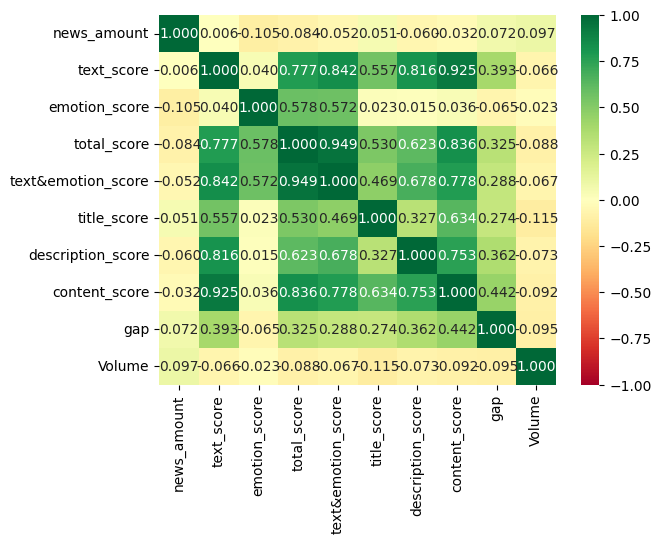

In [20]:
sns.heatmap(data=df_correlation,annot=True,fmt=".3f",vmin=-1, vmax=1, cmap='RdYlGn') 

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Time series

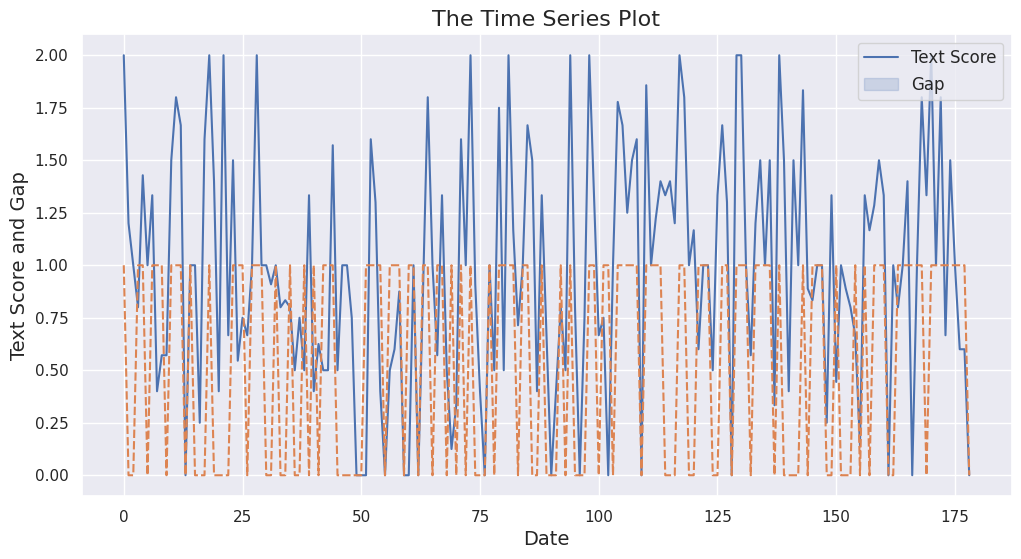

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style
sns.set_style('darkgrid')

# Create the line plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_final[['text_score', 'gap']], ax=ax)

# Add x and y axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Text Score and Gap', fontsize=14)

# Add a title to the plot
ax.set_title('The Time Series Plot', fontsize=16)

# Customize the legend
ax.legend(labels=['Text Score', 'Gap'], fontsize=12)

# Display the plot
plt.show()

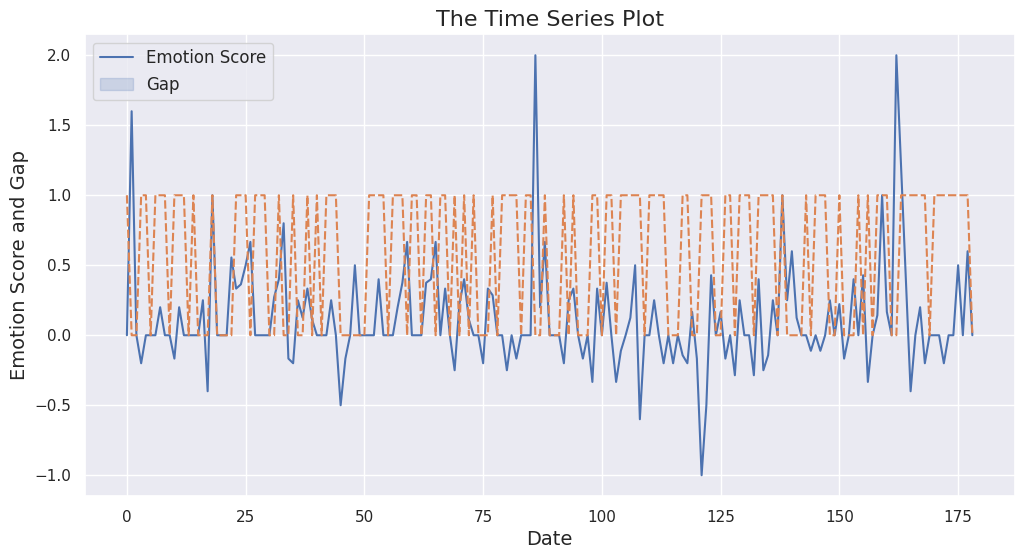

In [28]:
# Set the plot style
sns.set_style('darkgrid')

# Create the line plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_final[['emotion_score', 'gap']], ax=ax)

# Add x and y axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Emotion Score and Gap', fontsize=14)

# Add a title to the plot
ax.set_title('The Time Series Plot', fontsize=16)

# Customize the legend
ax.legend(labels=['Emotion Score', 'Gap'], fontsize=12)

# Display the plot
plt.show()

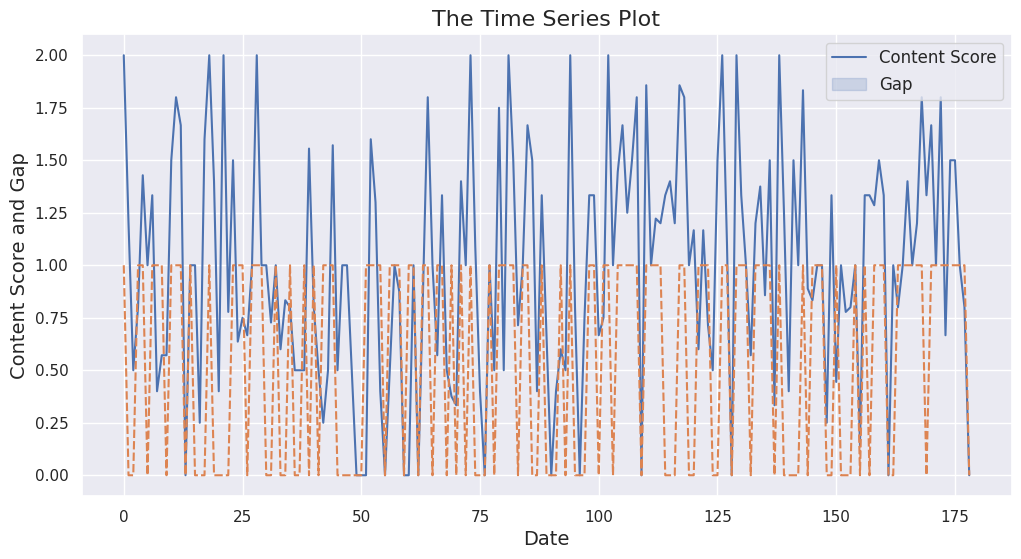

In [29]:
# Set the plot style
sns.set_style('darkgrid')

# Create the line plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_final[['content_score', 'gap']], ax=ax)

# Add x and y axis labels
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Content Score and Gap', fontsize=14)

# Add a title to the plot
ax.set_title('The Time Series Plot', fontsize=16)

# Customize the legend
ax.legend(labels=['Content Score', 'Gap'], fontsize=12)

# Display the plot
plt.show()

# Logistic Regression 

In [30]:
import pandas as pd
import statsmodels.api as sm

# load the data
data = pd.read_csv('/content/FT_FTSE100_final.csv')

# define the independent and dependent variables
X = data['text_score']
y = data['gap']

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the logistic regression model
model = sm.Logit(y, X).fit()

# print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.600833
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    gap   No. Observations:                  179
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                  0.1208
Time:                        21:17:30   Log-Likelihood:                -107.55
converged:                       True   LL-Null:                       -122.32
Covariance Type:            nonrobust   LLR p-value:                 5.462e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2439      0.342     -3.632      0.000      -1.915      -0.573
text_score     1.6112      0.

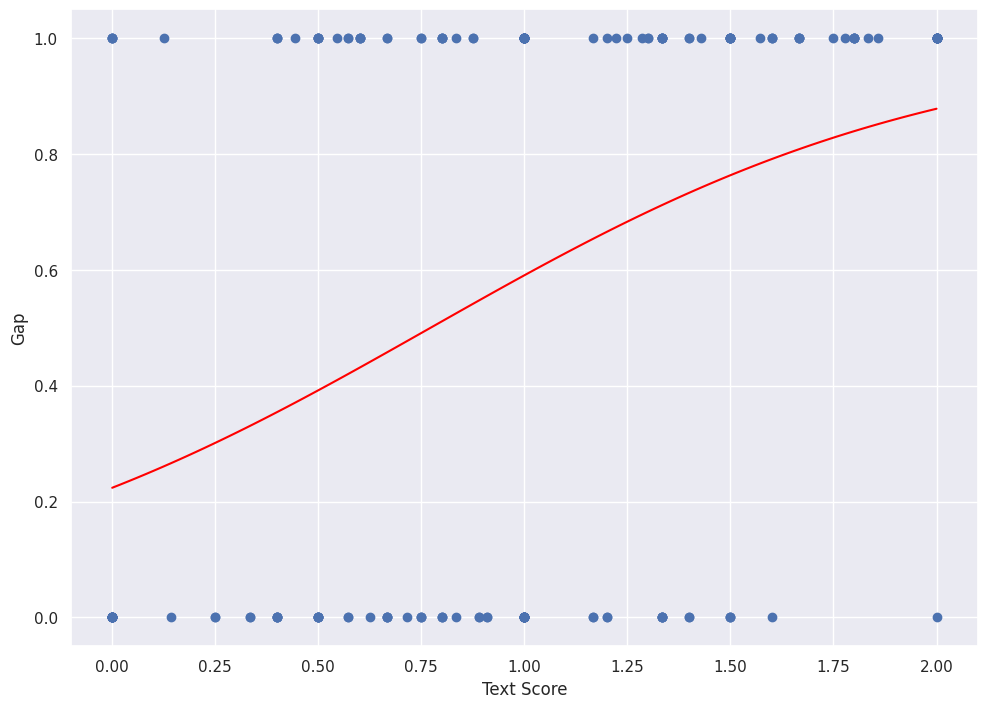

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values for the independent variable
x = np.linspace(data['text_score'].min(), data['text_score'].max(), 100)

# Calculate the predicted probabilities for the range of x values
pred_probs = 1 / (1 + np.exp(-(model.params['const'] + model.params['text_score']*x)))

# Plot the predicted probabilities against the independent variable
plt.scatter(data['text_score'], data['gap'])
plt.plot(x, pred_probs, color='red')
plt.xlabel('Text Score')
plt.ylabel('Gap')
plt.show()

In [33]:
import pandas as pd
import statsmodels.api as sm

# load the data
data = pd.read_csv('/content/FT_FTSE100_final.csv')

# define the independent and dependent variables
X = data['emotion_score']
y = data['gap']

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the logistic regression model
model = sm.Logit(y, X).fit()

# print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.681260
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    gap   No. Observations:                  179
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                0.003076
Time:                        21:28:23   Log-Likelihood:                -121.95
converged:                       True   LL-Null:                       -122.32
Covariance Type:            nonrobust   LLR p-value:                    0.3857
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3218      0.159      2.029      0.042       0.011       0.633
emotion_score    -0.

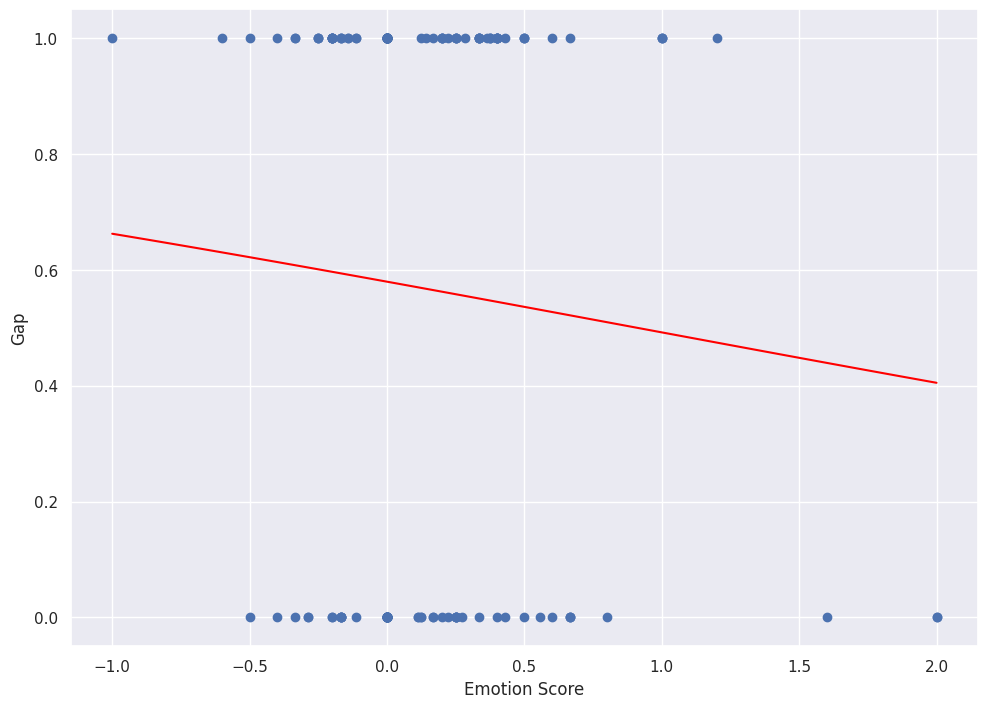

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values for the independent variable
x = np.linspace(data['emotion_score'].min(), data['emotion_score'].max(), 100)

# Calculate the predicted probabilities for the range of x values
pred_probs = 1 / (1 + np.exp(-(model.params['const'] + model.params['emotion_score']*x)))

# Plot the predicted probabilities against the independent variable
plt.scatter(data['emotion_score'], data['gap'])
plt.plot(x, pred_probs, color='red')
plt.xlabel('Emotion Score')
plt.ylabel('Gap')
plt.show()

In [35]:
import pandas as pd
import statsmodels.api as sm

# load the data
data = pd.read_csv('/content/FT_FTSE100_final.csv')

# define the independent and dependent variables
X = data['content_score']
y = data['gap']

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the logistic regression model
model = sm.Logit(y, X).fit()

# print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.577256
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    gap   No. Observations:                  179
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                  0.1553
Time:                        21:33:47   Log-Likelihood:                -103.33
converged:                       True   LL-Null:                       -122.32
Covariance Type:            nonrobust   LLR p-value:                 7.125e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5631      0.371     -4.217      0.000      -2.290      -0.837
content_score     1.

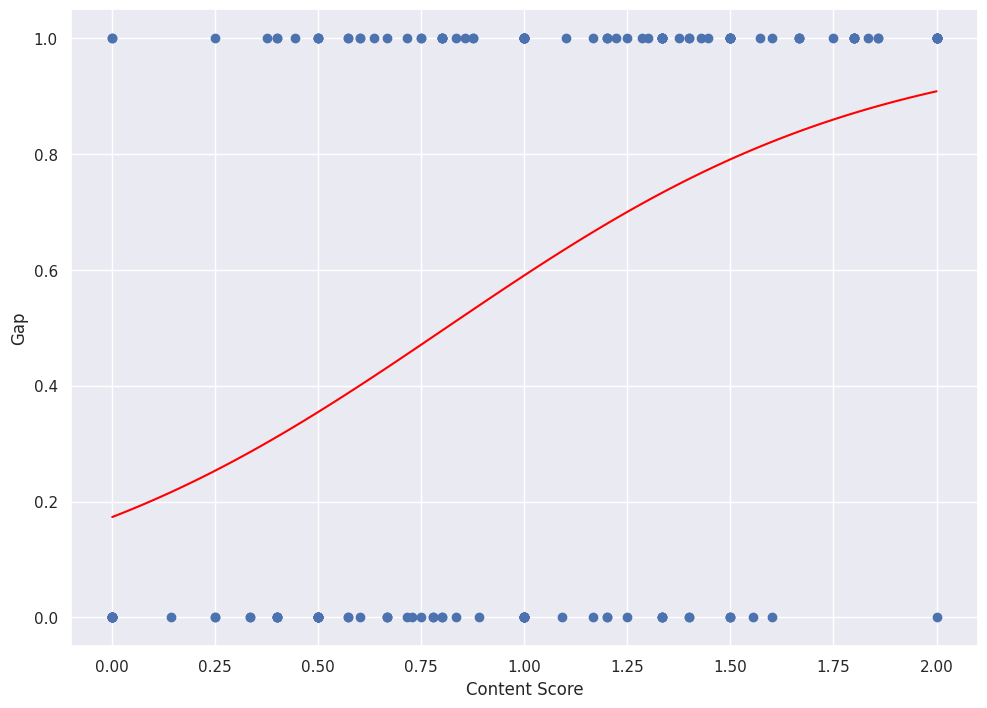

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values for the independent variable
x = np.linspace(data['content_score'].min(), data['content_score'].max(), 100)

# Calculate the predicted probabilities for the range of x values
pred_probs = 1 / (1 + np.exp(-(model.params['const'] + model.params['content_score']*x)))

# Plot the predicted probabilities against the independent variable
plt.scatter(data['content_score'], data['gap'])
plt.plot(x, pred_probs, color='red')
plt.xlabel('Content Score')
plt.ylabel('Gap')
plt.show()

In [37]:
import pandas as pd
import statsmodels.api as sm

# load the data
data = pd.read_csv('/content/FT_FTSE100_final.csv')

# define the independent and dependent variables
X = data['total_score']
y = data['gap']

# add a constant to the independent variable
X = sm.add_constant(X)

# fit the logistic regression model
model = sm.Logit(y, X).fit()

# print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.626168
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    gap   No. Observations:                  179
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                 0.08370
Time:                        21:37:00   Log-Likelihood:                -112.08
converged:                       True   LL-Null:                       -122.32
Covariance Type:            nonrobust   LLR p-value:                 6.040e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9253      0.325     -2.848      0.004      -1.562      -0.289
total_score     1.1335    

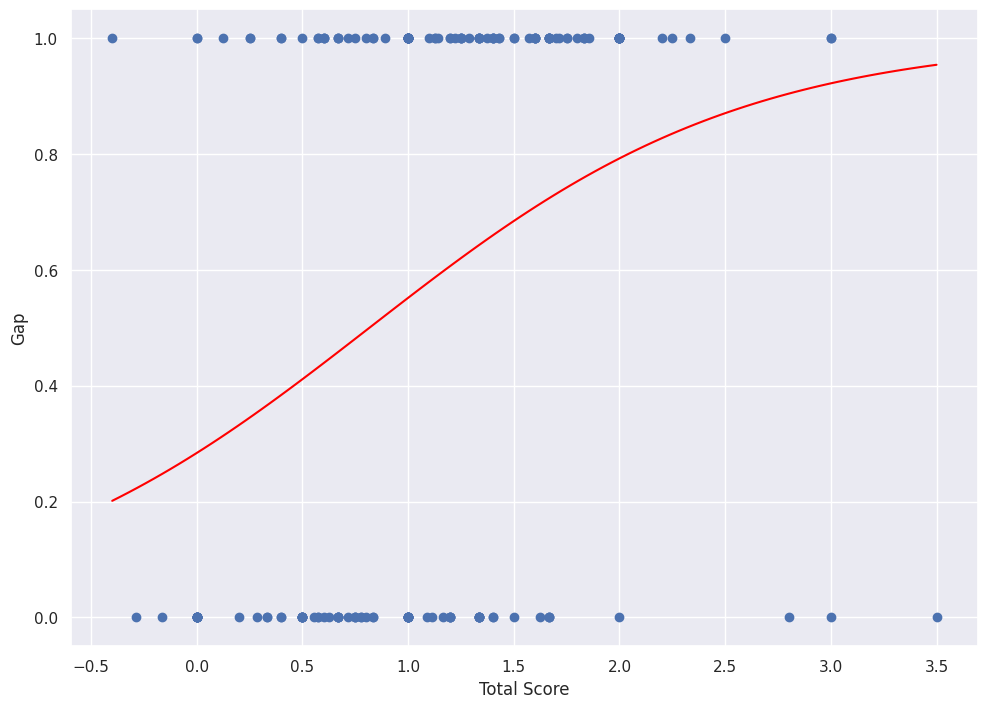

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Create a range of values for the independent variable
x = np.linspace(data['total_score'].min(), data['total_score'].max(), 100)

# Calculate the predicted probabilities for the range of x values
pred_probs = 1 / (1 + np.exp(-(model.params['const'] + model.params['total_score']*x)))

# Plot the predicted probabilities against the independent variable
plt.scatter(data['total_score'], data['gap'])
plt.plot(x, pred_probs, color='red')
plt.xlabel('Total Score')
plt.ylabel('Gap')
plt.show()

#Linear Regression

In [40]:
import pandas as pd
import statsmodels.api as sm

# Load data into a pandas dataframe
data = pd.read_csv('/content/FT_FTSE100_final.csv')

# Select the two variables to test
X = data['news_amount']
y = data['Volume']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.668
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.198
Time:                        21:42:03   Log-Likelihood:                -3733.4
No. Observations:                 179   AIC:                             7471.
Df Residuals:                     177   BIC:                             7477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.658e+08   5.09e+07     15.050      

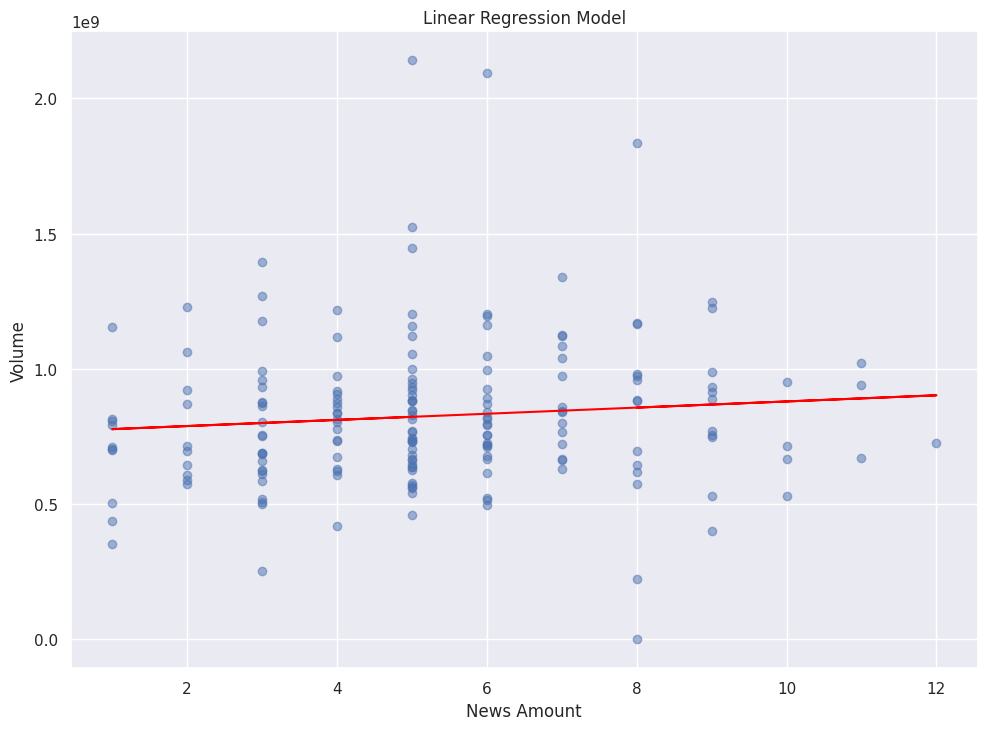

In [41]:
import matplotlib.pyplot as plt

# Visualize the data and the regression line
plt.scatter(X['news_amount'], y, alpha=0.5)
plt.plot(X['news_amount'], model.predict(X), color='red')

# Add labels and title to the plot
plt.xlabel('News Amount')
plt.ylabel('Volume')
plt.title('Linear Regression Model')

# Show the plot
plt.show()